In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 프레임 합치기

- ```python
  pd.concat([df1, df2...], axis=...)
  ```

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/data/apt_trade_part1.csv", index_col=0, parse_dates=True)
df2 = pd.read_csv("/content/drive/MyDrive/data/apt_trade_part2.csv", index_col=0, parse_dates=True)

In [ ]:
df = pd.concat([df1, df2], axis="index")

In [ ]:
# 내가 예상한대로 정확히 된건가?
# 합쳐진 데이터프레임의 행이 각 데이터프레임의 행의 합과 같은가? 
df.shape[0] == df1.shape[0] + df2.shape[0]

True

In [ ]:
# 데이터 check
# ex) df.head() # from the top
#     df.tail() # from the botton
df.sample(3) # random 샘플링

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong
cdate,,,,,,,,,,,,
2019-11-27,칠곡대백맨션,59.940,12400,5,1993,관음로 24,2019,11,27,대구광역시,북구,태전동
2021-04-21,백자,70.775,22000,3,1989,동촌로 346,2021,4,21,대구광역시,동구,용계동
2020-06-11,효성타운1차,108.380,37000,1,1988,효성중앙길 37,2020,6,11,대구광역시,남구,봉덕동


In [ ]:
df.info() # datatype, na 값 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74822 entries, 2020-05-14 to 2020-12-17
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   apt          74822 non-null  object 
 1   area         74822 non-null  float64
 2   transaction  74822 non-null  int64  
 3   floor        74822 non-null  int64  
 4   built        74822 non-null  int64  
 5   road         74822 non-null  object 
 6   year         74822 non-null  int64  
 7   month        74822 non-null  int64  
 8   day          74822 non-null  int64  
 9   city         74822 non-null  object 
 10  gu           74822 non-null  object 
 11  dong         74822 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 7.4+ MB



- 인덱스 정렬하기
    - ```python
df.sort_index()
```

In [ ]:
# 데이터를 인덱스 순서(시간순서)대로 정렬
df = df.sort_index()
df.tail()

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong
cdate,,,,,,,,,,,,
2021-05-31,아름다운나날3,84.6139,31900,15,2003,동호로 132,2021,5,31,대구광역시,동구,신서동
2021-05-31,화성그랜드파크,110.4038,48000,3,2003,구암로65길 9,2021,5,31,대구광역시,북구,구암동
2021-05-31,내당시영,55.3400,34150,3,1979,서대구로8길 15,2021,5,31,대구광역시,서구,내당동
2021-05-31,롯데캐슬오페라,84.9100,48800,15,2005,침산남로 160,2021,5,31,대구광역시,북구,침산동
2021-05-31,칠곡미래타운,84.9900,26000,9,1995,팔거천동로 52,2021,5,31,대구광역시,북구,구암동


In [ ]:
# Pandas dataframe timeseries indexing
# df.loc["2021":]
df.loc["20200101":]

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong
cdate,,,,,,,,,,,,
2020-01-01,밀레니엄,106.8300,40000,5,2001,신암북로7길 59,2020,1,1,대구광역시,동구,신암동
2020-01-01,청구타운,84.9250,28900,17,1995,진천로 41,2020,1,1,대구광역시,달서구,진천동
2020-01-01,수성풀비체,84.7456,32100,4,2007,화랑로32길 91,2020,1,1,대구광역시,수성구,만촌동
2020-01-01,시지3태왕하이츠,85.0000,33000,6,2001,욱수천로 77,2020,1,1,대구광역시,수성구,신매동
2020-01-01,대실역동화아이위시,84.7680,35000,7,2008,대실역북로 55,2020,1,1,대구광역시,달성군,다사읍 매곡리
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,아름다운나날3,84.6139,31900,15,2003,동호로 132,2021,5,31,대구광역시,동구,신서동
2021-05-31,화성그랜드파크,110.4038,48000,3,2003,구암로65길 9,2021,5,31,대구광역시,북구,구암동
2021-05-31,내당시영,55.3400,34150,3,1979,서대구로8길 15,2021,5,31,대구광역시,서구,내당동


## Aggregation

- Aggregate using one or more operations over the specified axis.
- aggregation에 넘길수 있는 케이스
    - function
    - str
    - list or dict

In [ ]:
number_df = df.select_dtypes(include=["number"]) # 숫자 datatype 인 column 만 선택
number_df.sample(2)

,area,transaction,floor,built,year,month,day
cdate,,,,,,,
2020-08-10,43.200,9500,2,1993,2020,8,10
2020-08-18,106.967,54000,8,2006,2020,8,18


In [ ]:
number_df.area.agg(sum) # python 에서 미리 정의 된 함수 sum

5814165.164899999

In [ ]:
number_df.area.agg(lambda x: x.sum())

5814165.164899999

In [ ]:
number_df.agg(sum)

area           5.814165e+06
transaction    2.376125e+09
floor          7.188420e+05
built          1.498070e+08
year           1.511315e+08
month          5.501510e+05
day            1.180816e+06
dtype: float64

In [ ]:
number_df.agg(['sum', 'mean'])

,area,transaction,floor,built,year,month,day
sum,5.814165e+06,2.376125e+09,718842.000000,1.498070e+08,1.511315e+08,550151.000000,1.180816e+06
mean,7.770663e+01,3.175704e+04,9.607361,2.002179e+03,2.019881e+03,7.352797,1.578167e+01


In [ ]:
# 내가 정의한 함수
def my_sum(data):
    return data.sum()

number_df.agg([sum, lambda x: x.sum(), my_sum])


,area,transaction,floor,built,year,month,day
sum,5.814165e+06,2376124990,718842,149807012,151131540,550151,1180816
<lambda>,5.814165e+06,2376124990,718842,149807012,151131540,550151,1180816
my_sum,5.814165e+06,2376124990,718842,149807012,151131540,550151,1180816


### Aggregation with dict

In [ ]:
number_df.agg({
    "transaction": "median",
    "floor":"max"
})

transaction    27400.0
floor             53.0
dtype: float64

In [ ]:
number_df.agg({
    "transaction": ["median", "mean"],
    "floor":"max"
})

,transaction,floor
max,NaN,53.0
mean,31757.036567,NaN
median,27400.000000,NaN


### 참고) 함수 속도 측정! 

In [ ]:
# -n 100: 100 번 함수를 실행시켜서, 속도를 측정해봐라~

%timeit -n 100 number_df['area'].apply(lambda x: x+1)
%timeit -n 100 number_df[['area']].apply(lambda x: x+1)

100 loops, best of 5: 18.7 ms per loop
100 loops, best of 5: 2.38 ms per loop


### custom describe

함수에 인자에 미리 값을 정해서 사용하고 싶다면 -> `partial`

In [ ]:
from functools import partial

In [ ]:
def cal_return(stock, date):
    print(f"stock:{stock}")
    print(date)
    return 0.3

In [ ]:
# cal_return(stock, date="20210101")
cal_return_with_date = partial(cal_return, date="20210101")

In [ ]:
cal_return_with_date

functools.partial(<function cal_return at 0x7fbf43c6b5f0>, date='20210101')

In [ ]:
cal_return_with_date("네이버")

stock:네이버
20210101


0.3

`partial` 을 `agg` 와 함께 사용하기

In [ ]:
q_25 = partial(pd.Series.quantile, q=0.25)

In [ ]:
q_25.__name__ = "25%"

In [ ]:
number_df.agg([q_25])

,area,transaction,floor,built,year,month,day
25%,59.91,18300.0,4.0,1995.0,2020.0,5.0,8.0


In [ ]:
q_25

functools.partial(<function Series.quantile at 0x7fbf4f700050>, q=0.25)

In [ ]:
# 보충, python f-string
a = 3.2345
text = "This is a number"
print(f"This is a number{a:.2f}")

This is a number3.23


### Quiz: number_df.describe() 의 결과를 `agg` 를 사용해서 똑같이 해보자.

In [ ]:
number_df.describe()

,area,transaction,floor,built,year,month,day
count,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000
mean,77.706626,31757.036567,9.607361,2002.178664,2019.881051,7.352797,15.781668
std,25.093547,20425.203404,6.472128,10.286096,0.592127,3.464989,8.630833
min,11.880000,1500.000000,-1.000000,1973.000000,2019.000000,1.000000,1.000000
25%,59.910000,18300.000000,4.000000,1995.000000,2020.000000,5.000000,8.000000
50%,83.491900,27400.000000,9.000000,2002.000000,2020.000000,8.000000,16.000000
75%,84.970000,39000.000000,14.000000,2011.000000,2020.000000,10.000000,23.000000
max,250.910000,345000.000000,53.000000,2021.000000,2021.000000,12.000000,31.000000


In [ ]:
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = "25%"


q_50 = partial(pd.Series.quantile, q=0.5)
q_50.__name__ = "50%"

q_75 = partial(pd.Series.quantile, q=0.75)
q_75.__name__ = "75%"

number_df.agg(['count', 'mean', 'std', 'min', q_25, q_50,  q_75, "max"])

,area,transaction,floor,built,year,month,day
count,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000
mean,77.706626,31757.036567,9.607361,2002.178664,2019.881051,7.352797,15.781668
std,25.093547,20425.203404,6.472128,10.286096,0.592127,3.464989,8.630833
min,11.880000,1500.000000,-1.000000,1973.000000,2019.000000,1.000000,1.000000
25%,59.910000,18300.000000,4.000000,1995.000000,2020.000000,5.000000,8.000000
50%,83.491900,27400.000000,9.000000,2002.000000,2020.000000,8.000000,16.000000
75%,84.970000,39000.000000,14.000000,2011.000000,2020.000000,10.000000,23.000000
max,250.910000,345000.000000,53.000000,2021.000000,2021.000000,12.000000,31.000000


## Transformation

- Call func on self producing a DataFrame with transformed values.
- Produced DataFrame will have same axis length as self.

- aggregation에 넘길수 있는 케이스
    - function
    - str
    - list or dict

In [ ]:
number_df.transaction.transform(lambda x: x+1)

cdate
2019-07-01    27101
2019-07-01    37401
2019-07-01    30651
2019-07-01    15101
2019-07-01     9801
              ...  
2021-05-31    31901
2021-05-31    48001
2021-05-31    34151
2021-05-31    48801
2021-05-31    26001
Name: transaction, Length: 74822, dtype: int64

In [ ]:
number_df.transaction.transform([abs, lambda x: x+1])

,abs,<lambda>
cdate,,
2019-07-01,27100,27101
2019-07-01,37400,37401
2019-07-01,30650,30651
2019-07-01,15100,15101
2019-07-01,9800,9801
...,...,...
2021-05-31,31900,31901
2021-05-31,48000,48001
2021-05-31,34150,34151


In [ ]:
number_df.transform([abs, lambda x: x+1])

area           transaction           ... month          day         
                 abs  <lambda>         abs <lambda>  ...   abs <lambda> abs <lambda>
cdate                                                ...                            
2019-07-01   84.1347   85.1347       27100    27101  ...     7        8   1        2
2019-07-01   84.9999   85.9999       37400    37401  ...     7        8   1        2
2019-07-01   59.9500   60.9500       30650    30651  ...     7        8   1        2
2019-07-01   59.9900   60.9900       15100    15101  ...     7        8   1        2
2019-07-01   49.8000   50.8000        9800     9801  ...     7        8   1        2
...              ...       ...         ...      ...  ...   ...      ...  ..      ...
2021-05-31   84.6139   85.6139       31900    31901  ...     5        6  31       32
2021-05-31  110.4038  111.4038       48000    48001  ...     5        6  31       32
2021-05-31   55.3400   56.3400       34150    34151  ...     5        6  31       32
2021-05-31   84.9100   85.9100       48800    48801  ...     5        6  31       32
2021-05-31   84.9900   85.9900       26000    26001  ...     5        6  31       32

[74822 rows x 14 columns]

In [ ]:
number_df.transform({
    "transaction": lambda x: x*10000,
    "floor":[lambda x: x+2, "abs"]
})

transaction    floor    
              <lambda> <lambda> abs
cdate                              
2019-07-01   271000000       13  11
2019-07-01   374000000       11   9
2019-07-01   306500000       27  25
2019-07-01   151000000       21  19
2019-07-01    98000000       12  10
...                ...      ...  ..
2021-05-31   319000000       17  15
2021-05-31   480000000        5   3
2021-05-31   341500000        5   3
2021-05-31   488000000       17  15
2021-05-31   260000000       11   9

[74822 rows x 3 columns]

## Group by: split-apply-combine

By “[group by](https://pandas.pydata.org/docs/user_guide/groupby.html)” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

- 동구의 거래대금의 중간값을 구해보자

In [ ]:
gu_condition = df.gu == "동구"
df.loc[gu_condition]['transaction'].mean()

27791.46819313091

### ex) 우리동네는 어떨까?
자신이 살고 있는 구의 거래 금액에 대한 중간값을 알아보자

In [ ]:
gu_condition = df.gu == "북구"
df.loc[gu_condition]['transaction'].median()

22700.0

### `groupby` method 를 통해서 각 구의 거래 금액의 중간값을 알아보자

1. 각 '구'별로 데이터를 그룹화시킨다
2. 각 그룹데이터마다 '중간값'을 구한다.
3. 결과를 합친다. 

In [ ]:
# groupby 가 없었으면 위의 코드를 8번이나 반복해야한다.!
df.groupby('gu')['transaction'].median()

gu
남구     29500
달서구    28000
달성군    22800
동구     26500
북구     22700
서구     26500
수성구    39300
중구     47000
Name: transaction, dtype: int64

### groupby 의 이해
         - 모를땐 하나하나 뜯어보자

In [ ]:
df.groupby('gu')['transaction']

In [ ]:
for group_name, group_data, in df.groupby('gu')['transaction']:
    print(group_name, type(group_name), group_data.shape, type(group_data), group_data.mean())

남구 <class 'str'> (2021,) <class 'pandas.core.series.Series'> 31245.86937159822
달서구 <class 'str'> (19754,) <class 'pandas.core.series.Series'> 30666.780601397186
달성군 <class 'str'> (10837,) <class 'pandas.core.series.Series'> 23045.91621297407
동구 <class 'str'> (10045,) <class 'pandas.core.series.Series'> 27791.46819313091
북구 <class 'str'> (14768,) <class 'pandas.core.series.Series'> 25828.308369447455
서구 <class 'str'> (2263,) <class 'pandas.core.series.Series'> 26432.88422448078
수성구 <class 'str'> (12973,) <class 'pandas.core.series.Series'> 49288.61319663918
중구 <class 'str'> (2161,) <class 'pandas.core.series.Series'> 45164.44146228598


### 1. splitting

In [ ]:
df.groupby('gu')

In [ ]:
# 어떻게 그룹화되었는지 알 수 있다.
df.groupby('gu').groups

{'남구': [2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-02 00:00:00, 2019-07-03 00:00:00, 2019-07-03 00:00:00, 2019-07-03 00:00:00, 2019-07-04 00:00:00, 2019-07-04 00:00:00, 2019-07-05 00:00:00, 2019-07-06 00:00:00, 2019-07-06 00:00:00, 2019-07-06 00:00:00, 2019-07-08 00:00:00, 2019-07-08 00:00:00, 2019-07-08 00:00:00, 2019-07-09 00:00:00, 2019-07-09 00:00:00, 2019-07-10 00:00:00, 2019-07-10 00:00:00, 2019-07-11 00:00:00, 2019-07-12 00:00:00, 2019-07-12 00:00:00, 2019-07-12 00:00:00, 2019-07-12 00:00:00, 2019-07-13 00:00:00, 2019-07-14 00:00:00, 2019-07-14 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-17 00:00:00, 2019-07-17 00:00:00, 2019-07-17 00:00:00, 2019-

In [ ]:
# 함수를 넘겨줘도 상관 없다.
# 모든 행에대해서 어떤 그룹인지 정해 줄 수 있으면 된다.
def month_split(index):
    return index.month

df.groupby(month_split)['transaction'].max()

1     245000
2     190000
3     243000
4     250000
5     235000
6     220000
7     345000
8     207000
9     249000
10    245000
11    345000
12    255000
Name: transaction, dtype: int64

### 2. apply & combining

In [ ]:
target_cols = ['transaction', 'built']
df.groupby('gu')[target_cols].min()

,transaction,built
gu,,
남구,5900,1977
달서구,4000,1978
달성군,1500,1984
동구,4700,1974
북구,4800,1978
서구,5220,1978
수성구,7300,1976
중구,5000,1973


In [ ]:
df.groupby('gu')['built'].apply(min)

gu
남구     1977
달서구    1978
달성군    1984
동구     1974
북구     1978
서구     1978
수성구    1976
중구     1973
Name: built, dtype: int64

In [ ]:
df.groupby('gu')[['transaction', 'month', 'year', 'area']].min()

,transaction,month,year,area
gu,,,,
남구,5900,1,2019,35.2750
달서구,4000,1,2019,30.6000
달성군,1500,1,2019,23.1000
동구,4700,1,2019,17.8000
북구,4800,1,2019,22.2388
서구,5220,1,2019,22.9500
수성구,7300,1,2019,11.8800
중구,5000,1,2019,12.6520


In [ ]:
df.groupby('apt')['transaction'].agg(['min', 'max', 'median'])

,min,max,median
apt,,,
(1197-20),28000,33700,29500.0
(417-2),22000,25800,24800.0
(420-0),23500,23800,23650.0
(화원)영남,16800,29500,23900.0
(화원)청구청탑맨션,12000,24700,15300.0
...,...,...,...
희망교대성유니드,24500,58000,32100.0
힐데스하임아파트,19000,32950,24900.0
힐스테이트 범어,104100,200000,151000.0


### ex) 거래대금이 가장 변동성이 높은 '구'를 고르시요

- hint: sort_values

In [ ]:
df.groupby('gu')['transaction'].std().sort_values(ascending=False)

gu
수성구    32713.633015
달서구    15850.797591
중구     15751.054449
남구     13076.174494
북구     12966.683614
동구     11986.849957
서구     11385.730106
달성군    10975.464711
Name: transaction, dtype: float64

### ex) 거래대금이 가장 변동성이 높은 아파트를 10개를 출력해보세요

In [ ]:
df.groupby('apt')['transaction'].std().nlargest(10) #nsmallest(10)

apt
태왕아너스         42160.360147
수성포레힐         41605.288125
두산위브더제니스      38028.892459
수성하이츠         37925.332116
유림노르웨이숲       30616.494793
현대하이페리온2단지    30471.805860
경남타운          30112.092176
범어롯데캐슬        29530.375040
범어에스케이뷰       29463.156095
을지맨션          27638.595359
Name: transaction, dtype: float64

In [ ]:
df.describe()

,area,transaction,floor,built,year,month,day
count,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000,74822.000000
mean,77.706626,31757.036567,9.607361,2002.178664,2019.881051,7.352797,15.781668
std,25.093547,20425.203404,6.472128,10.286096,0.592127,3.464989,8.630833
min,11.880000,1500.000000,-1.000000,1973.000000,2019.000000,1.000000,1.000000
25%,59.910000,18300.000000,4.000000,1995.000000,2020.000000,5.000000,8.000000
50%,83.491900,27400.000000,9.000000,2002.000000,2020.000000,8.000000,16.000000
75%,84.970000,39000.000000,14.000000,2011.000000,2020.000000,10.000000,23.000000
max,250.910000,345000.000000,53.000000,2021.000000,2021.000000,12.000000,31.000000


In [ ]:
df.sample(5)

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong
cdate,,,,,,,,,,,,
2020-01-20,북죽곡엠코타운더솔레뉴,76.5713,27700,20,2016,세천로 160,2020,1,20,대구광역시,달성군,다사읍 세천리
2020-07-09,제림은탑맨션,84.9900,29000,1,1994,천을로 49,2020,7,9,대구광역시,수성구,시지동
2020-09-05,대구이시아폴리스더샵3차,84.8500,40500,17,2013,팔공로51길 10,2020,9,5,대구광역시,동구,봉무동
2019-12-10,코스모스한양,84.9450,21500,4,1993,구암로21길 6,2019,12,10,대구광역시,북구,읍내동
2020-02-12,칠곡이편한세상,84.7337,33300,4,2009,칠곡중앙대로 598,2020,2,12,대구광역시,북구,읍내동


## Plot with Pandas

- pandas.DataFrame.plot
- pandas.Series.plot

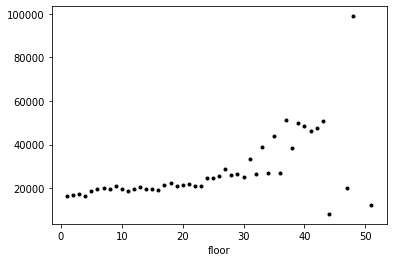

In [ ]:
df.groupby('floor').transaction.std().plot(style="k.")

### ex) scatter plot 을 그려보자

가로축(x)은 건물의 최고높이, 세로축(y)은 그 건물의 거래금액 중간값으로 해서, scatter plot 으로 그리시오

- hint: 
```python
        >>> pd.DataFrame.plot(x='...', y='...', kind='scatter')
```

In [ ]:
floor = df.groupby('apt').floor.max()
howmuch = df.groupby('apt').transaction.median()
relation_df = pd.concat([floor, howmuch], axis=1)
relation_df.head(2)

,floor,transaction
apt,,
(1197-20),9,29500.0
(417-2),9,24800.0


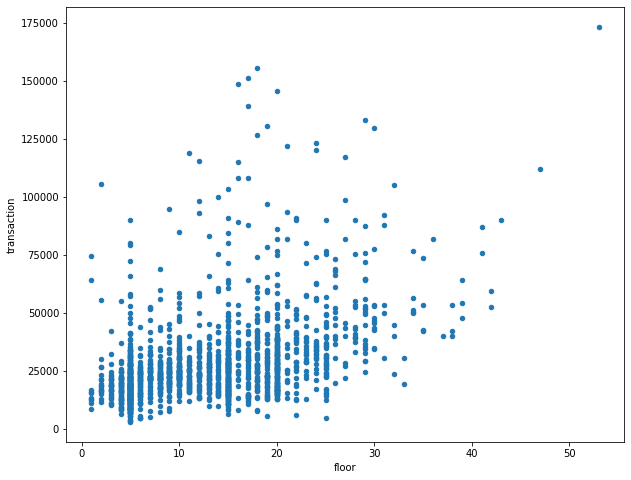

In [ ]:
relation_df.plot(x='floor', y='transaction', kind='scatter', figsize=(10, 8))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


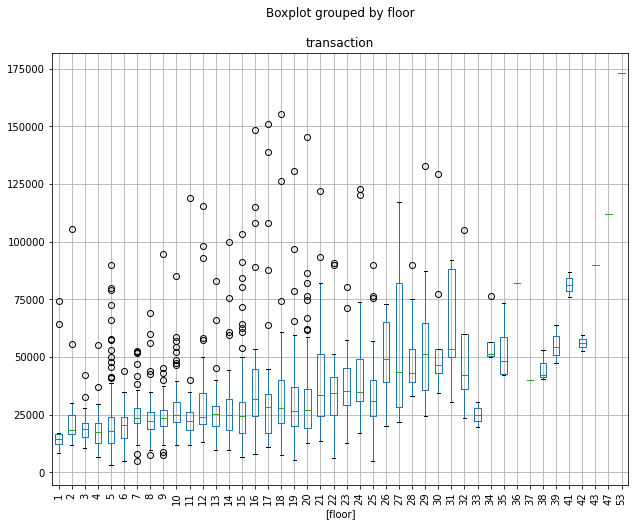

In [ ]:
# 위 그래프를 boxplot 으로 그리기
relation_df.boxplot(by="floor", rot=90, figsize=(10, 8))

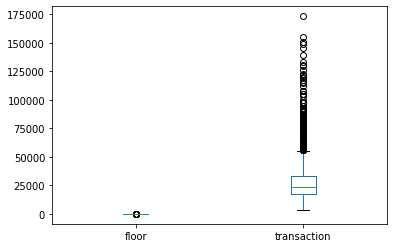

In [ ]:
# Wrong! 이렇게 하면 안된다
relation_df.plot.box(by='floor')

- 데이터 Scale 문제 처리(서로 다른 범주의 데이터를 비교할 때 필요한 방법)
    - min, max 활용
        - ex) x-x.min()/(x.max()-x.min())

## 어제 질문 map! 

### pd.Series.map 과 pd.Series.apply의 차이는?
- 요약
    - apply 에는 (호출할수있는) 함수가 들어와야하지만
    - map는 어떻게 값을 변경해야되는지 알려줄수만 있으면 된다.

In [ ]:
file_path = "/content/drive/MyDrive/data/아파트(매매)__실거래가_(20190701_20200531).csv"

raw_df = pd.read_csv(file_path, skiprows=15, encoding='euc-kr')
raw_df.sample(2)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
12847,대구광역시 달성군 유가읍 봉리,659,659,0,호반베르디움2차,98.8946,201908,30,"34,200",17,2016,테크노대로5길 80,NaN
30488,대구광역시 수성구 지산동,1234-1,1234,1,지산2단지,59.5600,201908,27,"16,400",15,1991,지산로 5,NaN


### map 의 활용

In [ ]:
raw_df['도로명'][:5]

0    양지남길 28
1    대명로 117
2    대명로 117
3    대명로 117
4    대명로 117
Name: 도로명, dtype: object

In [ ]:
change_map = {
    "양지남길 28": "양",
    "대명로"  : "대"
}

raw_df['도로명'][:5].map(change_map)

0      양
1    NaN
2    NaN
3    NaN
4    NaN
Name: 도로명, dtype: object

In [ ]:
raw_df['도로명'][:5].map("-----> {}".format)

0    -----> 양지남길 28
1    -----> 대명로 117
2    -----> 대명로 117
3    -----> 대명로 117
4    -----> 대명로 117
Name: 도로명, dtype: object

In [ ]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
dic = {1:5, 2:4}
s.map(dic)

0    5.0
1    4.0
2    NaN
3    NaN
dtype: float64

#### apply vs map

##### 'dic' 이 함수가 아니기 때문에 에러가난다

In [ ]:
s.apply(dic)

TypeError: ignored

##### `map`은 되는데 `apply`는 안되는 경우

In [ ]:
s.apply(s)

- 's' 는 index Series 라서 label-based 접근이 가능하다. 따라서 함수는 아니지만 'index'를 주면 'value'를 줄 수 있기 때문에 `map` 사용이 가능하다

In [ ]:
s.map(s)

In [ ]:
for i in s.index:
    print(s[i])

##### `apply`는 되는데 `map`은 안되는 경우

함수에 인자값을 줄수 있다.

In [ ]:
def my_cal(x, a):
    return x + a


s.apply(my_cal, a=2)


# Quiz

## 1. 가장 거래가 많이 일어난 아파트는?

In [ ]:
df.groupby('apt').transaction.count().nlargest()

In [ ]:
df.groupby('apt').transaction.count().sort_values(ascending=False)[:5]

## 2. 가장 거래금액이 컸던 아파트는?

In [ ]:
df.groupby('apt').transaction.max().nlargest(5)

## 3. 각자 살고있는 구에서 가장 비싼 아파트는 어디인가?

In [ ]:
gu_condition = df.gu == '북구'

df.loc[gu_condition].groupby('apt').transaction.max().nlargest(5)

In [ ]:
df.gu.nunique() # len(df.gu.unique())

In [ ]:
for gu_name in df.gu.unique():
    gu_condition = df.gu == gu_name
    apt_name = df.loc[gu_condition].groupby('apt').transaction.max().nlargest(1)
    print(f"{gu_name}>>> 아파트이름:{apt_name.index[0]} 가격:{apt_name.array[0]:,} 만원")

## 4. 2020년 이후의 거래에서, 평당 가격이 가장 비싼 아파트는 어디인가?


In [ ]:
new_df = df.assign(ta = df['transaction']/df['area'])
(new_df["2020":].reset_index()
                 .groupby(['apt'])
                 .ta.max()
                 .sort_values(ascending=False))

In [ ]:
new_df["2020":].sort_values(by='ta', ascending=False)[['ta', 'apt']]

## 5. 2020년 이후의 거래에서, 평당 가격의 최대 최소 차이가 가장 많이 나는 아파트 5개를 알아보자

In [ ]:
after_df = new_df.loc["2020":]
after_df.groupby('apt').ta.agg(lambda x: x.max()-x.min()).nlargest(5)

## 6. 추가) x 축에는 '월' y 축에는 거래횟수 를 Bar 차트로 그려보자

-  hint: 
```python
>>> pd.Series.plot.bar()
```

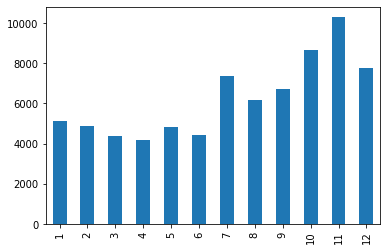

In [ ]:
df.index.month.value_counts().sort_index().plot.bar()

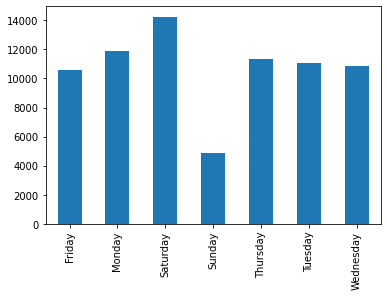

In [ ]:
df.index.day_name().value_counts().sort_index().plot.bar()

## 7. 추가) x  축에는 건축년도,  y 축에는 각 건축년도의 건물들의 매매금액 중간값 를 Bar 차트로 그려보자

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

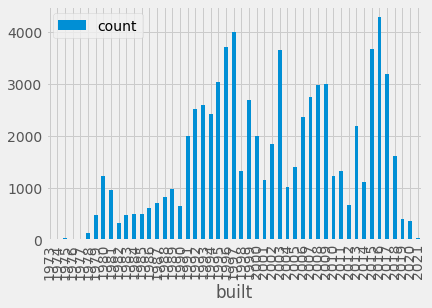

In [ ]:
df.groupby('built').transaction.agg(['count']).plot.bar(rot="90")